<a href="https://colab.research.google.com/github/Rishabhjain33/Enhancing-Stress-Detection-Using-Advanced-Feature-Selection-and-Deep-Learning/blob/main/Graph_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Graph Visualisation

In [ ]:
pip install wfdb  #install library


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
!wget -r -N -c -np https://physionet.org/files/drivedb/1.0.0/      #import dataset from physionet


--2024-03-21 15:11:03--  https://physionet.org/files/drivedb/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/drivedb/1.0.0/index.html’

physionet.org/files     [ <=>                ]   4.52K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-03-21 15:11:04 (673 MB/s) - ‘physionet.org/files/drivedb/1.0.0/index.html’ saved [4626]

Loading robots.txt; please ignore errors.
--2024-03-21 15:11:04--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2024-03-21 15:11:04 (12.8 MB/s) - ‘physionet.org/robots.txt’ saved [22/22]

--2024-03-21 15:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

shutil.copy('/content/drive/My Drive/stress/stress-recognition-in-automobile-drivers-1.0.0/drive01.dat', '/content/drive/My Drive/')



'/content/drive/My Drive/drive01.dat'

In [ ]:
import wfdb

# Load data from Google Drive
record = wfdb.rdrecord('/content/drive/My Drive/stress/stress-recognition-in-automobile-drivers-1.0.0/drive01.dat', sampfrom=0, sampto=1000)


In [ ]:
all_signal=[] # This list will contain all signals
meta_data=[]
for file in sorted(os.listdir("/content/drive/MyDrive/stress/stress-recognition-in-automobile-drivers-1.0.0/")):
    if file.endswith(".dat"): # we take only the .dat files
        # Use wfdb.rdsamp to read wfdb data.
        # signals, a 2d numpy array to store the physical signals in the record;
        # fields, a dictionary containing several key attributes of the read record (fs|units|sig_name|comments)
        signals, fields = wfdb.rdsamp("/content/drive/MyDrive/stress/stress-recognition-in-automobile-drivers-1.0.0/" + os.path.splitext(file)[0])
        # Signal data, including various biosignals during 18 driving sessions
        all_signal.append(signals)
        # Media data, signal data structure, data unit, etc.
        meta_data.append(fields)

In [ ]:
import numpy as np
import pandas as pd
import os, wfdb, math
import matplotlib.pyplot as plt
import seaborn as sns

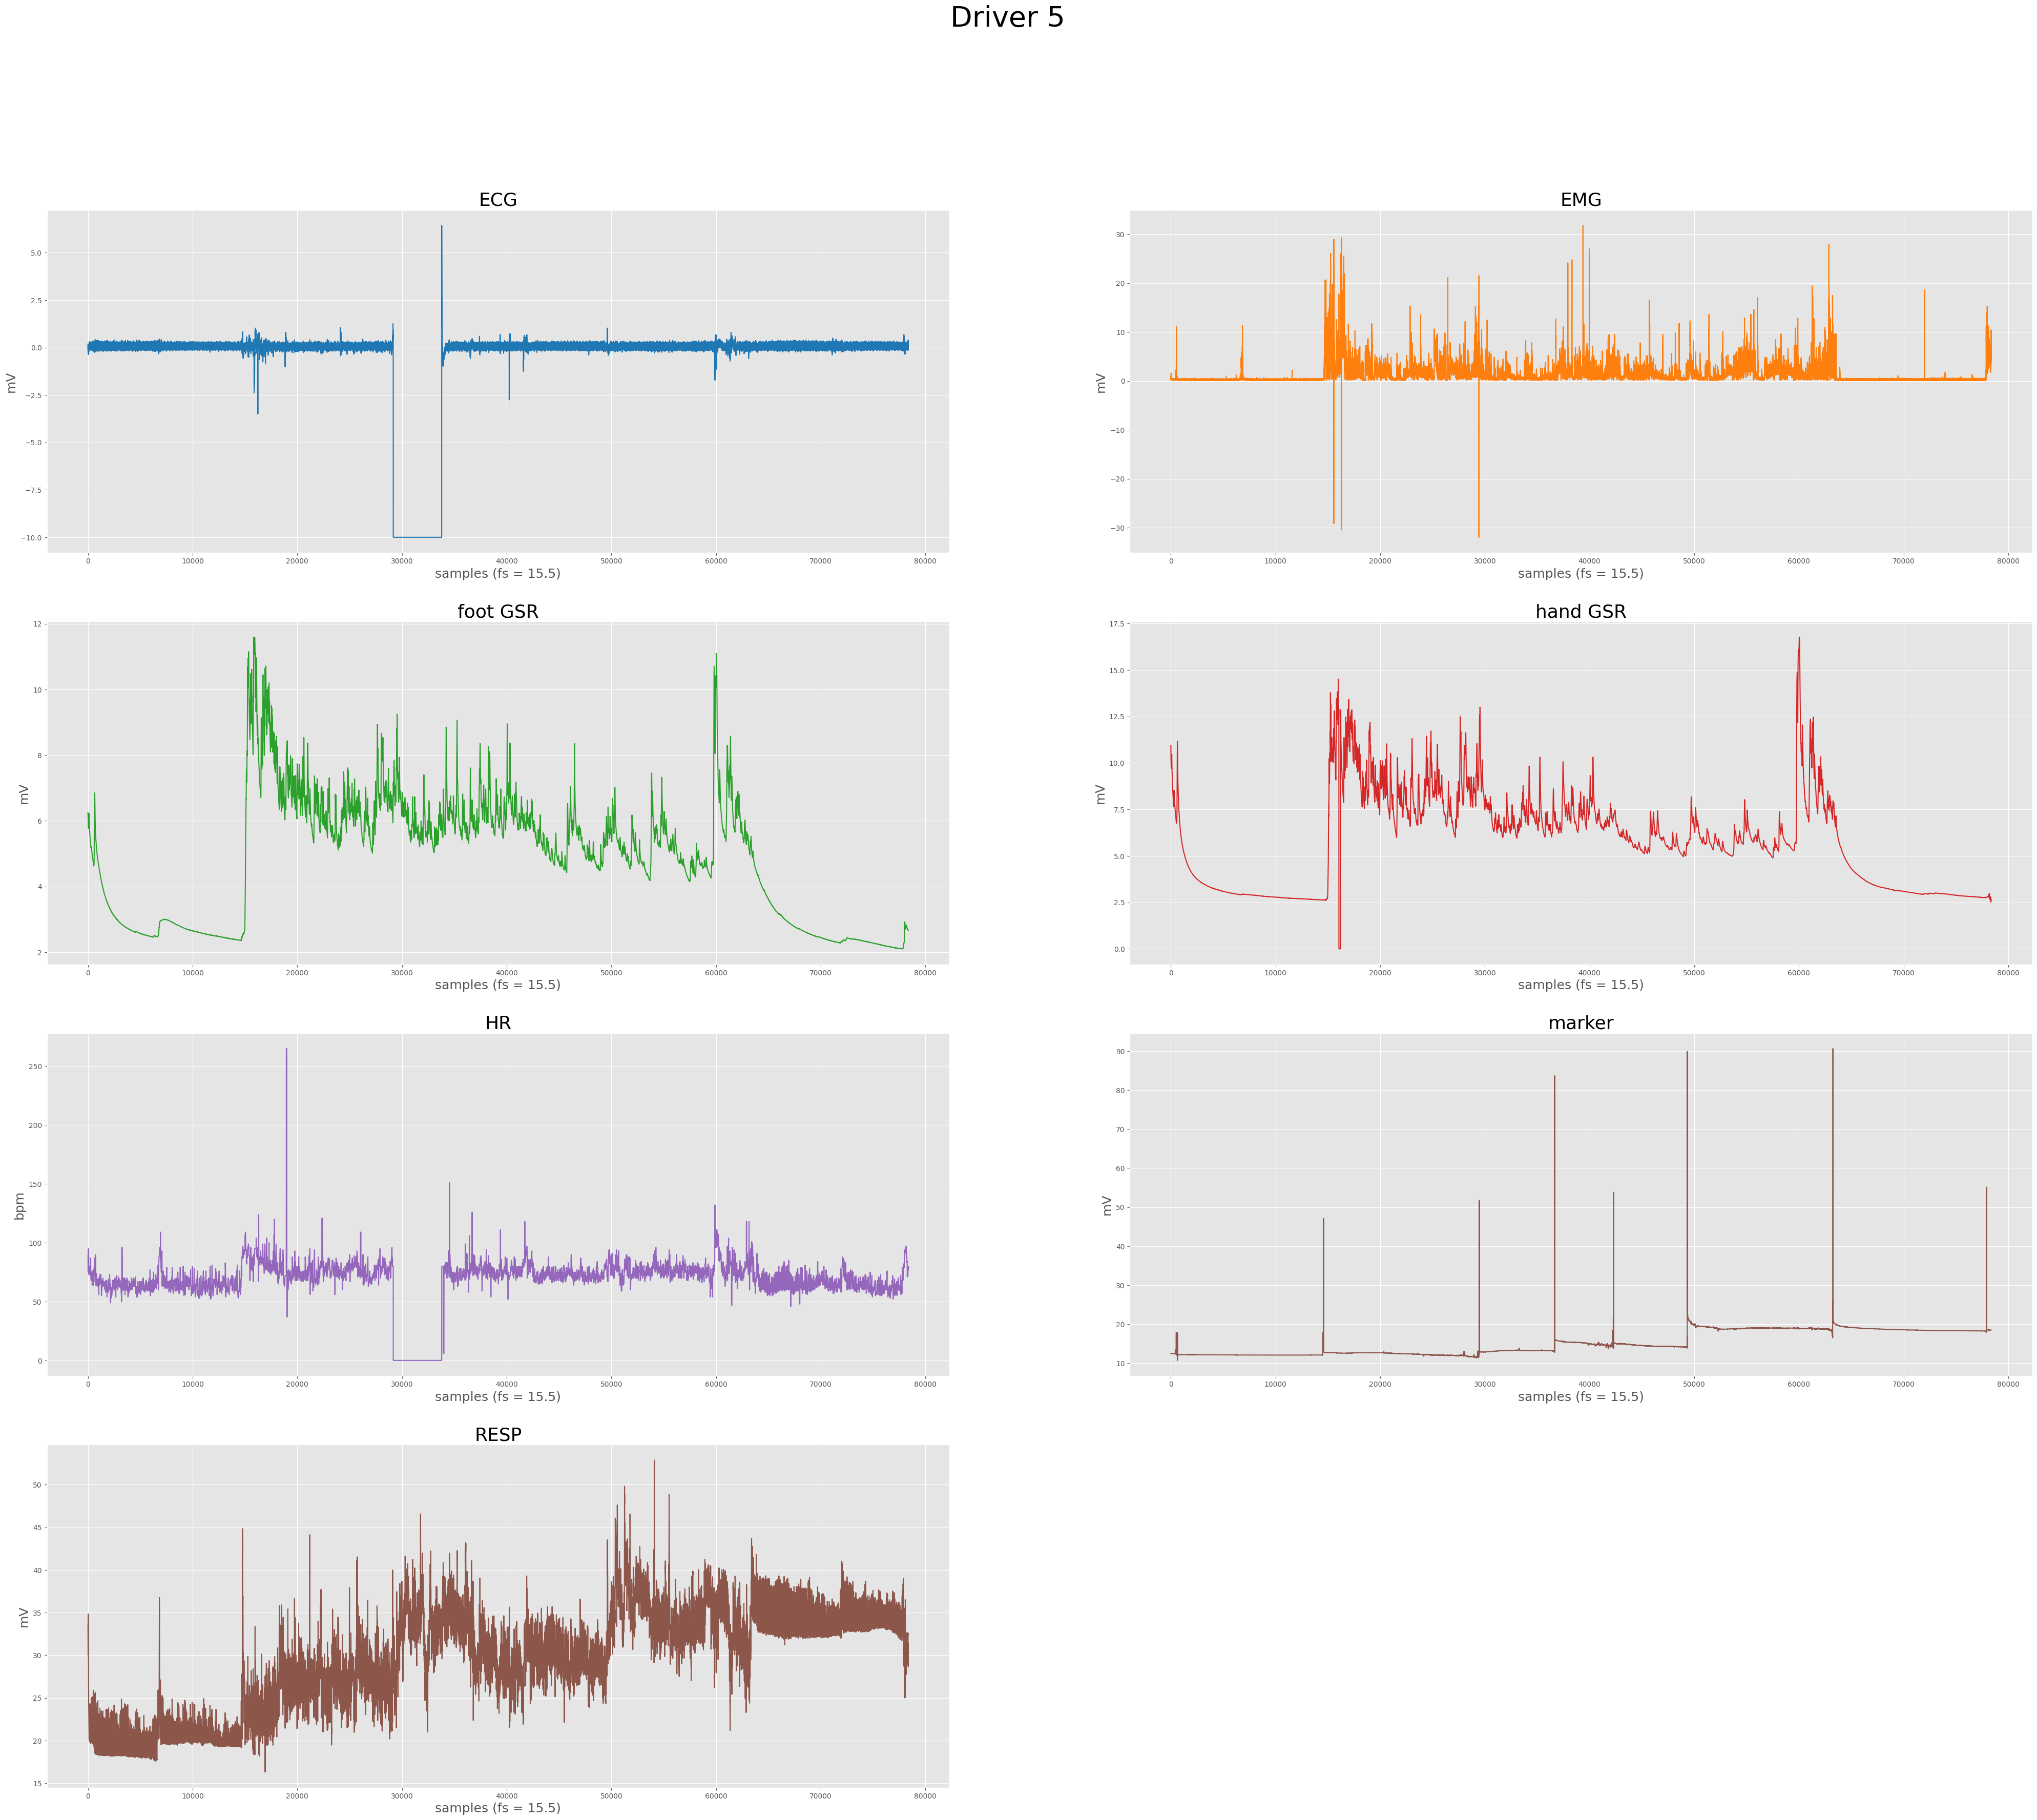

In [ ]:
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 5", fontsize=40)
for i in range(all_signal[4].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[4]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[4].T[i], color=my_colors[i])
    plt.title(meta_data[4]['sig_name'][i],fontsize=26)

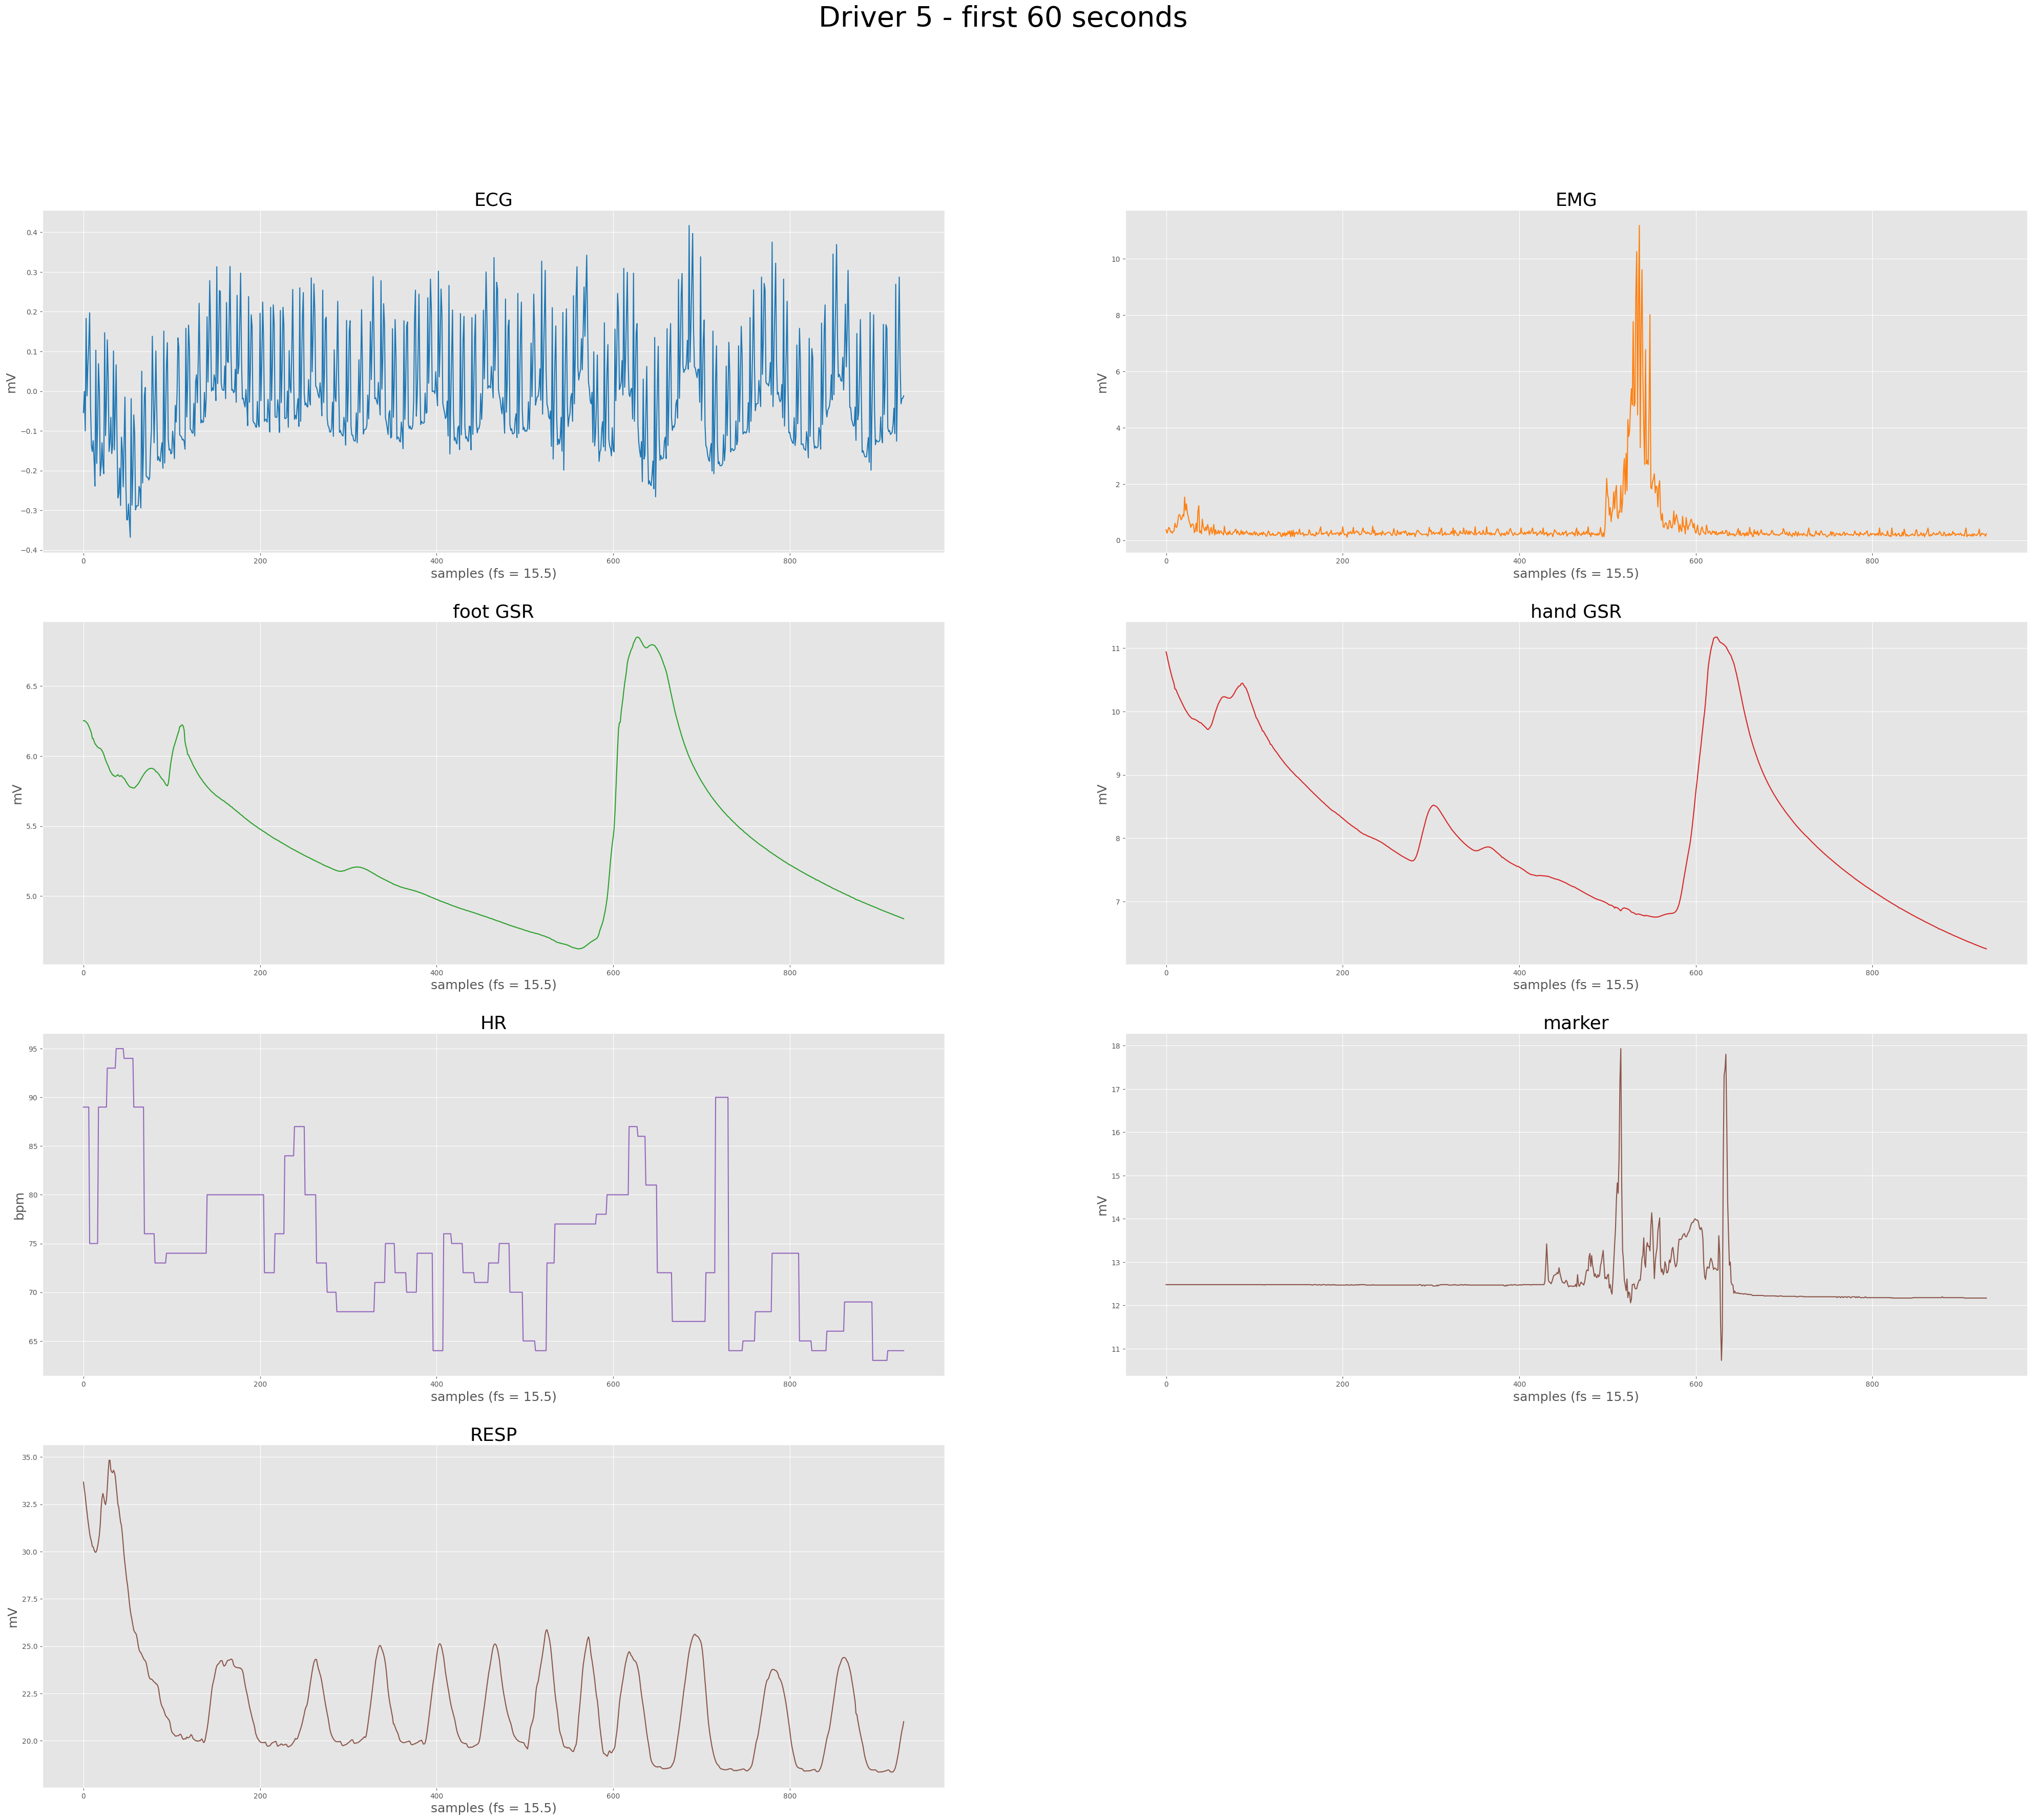

In [ ]:
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 5 - first 60 seconds", fontsize=40)
for i in range(all_signal[4].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[4]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[4].T[i][0:int(15.5 * 60)], color=my_colors[i])
    plt.title(meta_data[4]['sig_name'][i],fontsize=26)

In [ ]:
df_time_intervals = pd.read_csv('/content/drive/MyDrive/stress/time_intervals.csv',sep = ',')

In [ ]:
# Display the total driving time of each driver, the number of collected signals, and the name of each signal
i=1
for item in meta_data:
    print("driver",i)
    i=i+1
    print("total time(min):", round(item['sig_len']/15.5/60, 2))
    print("sigal number:",item['n_sig'])
    print("sigal name:",item['sig_name'])
    print("--------------------")

driver 1
total time(min): 66.13
sigal number: 6
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'RESP']
--------------------
driver 2
total time(min): 83.93
sigal number: 5
sigal name: ['ECG', 'foot GSR', 'HR', 'marker', 'RESP']
--------------------
driver 3
total time(min): 185.43
sigal number: 4
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'RESP']
--------------------
driver 4
total time(min): 82.01
sigal number: 6
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 5
total time(min): 84.27
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 6
total time(min): 80.78
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 7
total time(min): 88.65
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSr', 'HR', 'marker', 'RESP']
--------------------
driver 8
total time(min): 81.19
sigal number: 7
si

In [ ]:
df_time_intervals

,Driver,Rest1,City1,Highway1,City2,Highway2,City3,Rest2,TotalTime(min)
0,Drive05,15.13,16.00,7.74,6.06,7.56,14.96,15.75,83.23
1,Drive06,15.05,14.49,7.32,6.53,7.64,12.29,15.05,78.38
2,Drive07,15.04,16.23,10.96,9.83,7.64,10.15,15.03,84.87
3,Drive08,15.00,12.31,7.23,9.51,7.64,13.43,15.07,80.19
4,Drive09,15.66,19.21,8.47,5.20,7.06,13.21,NaN,68.82
5,Drive10,15.04,15.30,8.66,5.27,7.04,12.06,14.79,78.15
6,Drive11,15.02,15.81,7.43,7.15,6.96,11.72,14.99,79.08
7,Drive12,15.01,13.41,7.56,6.50,8.06,11.68,15.01,77.23
8,Drive15,15.00,12.54,7.24,5.99,6.82,12.12,15.00,74.70
9,Drive16,15.01,16.12,7.14,5.12,6.81,13.91,NaN,64.10


In [ ]:
# Change the column name for easy operation
df_time_intervals.columns = ['Drive', 'Rest1', 'City1', 'Hwy1', 'City2', 'Hwy2', 'City3', 'Rest2', 'Total']
# Create a Dataframe for each start time
df_time_start = df_time_intervals.copy()
df_time_start['Rest1'] = 0
df_time_start['City1'] = df_time_start['Rest1'] + df_time_intervals['Rest1']
df_time_start['Hwy1'] = df_time_start['City1'] + df_time_intervals['City1']
df_time_start['City2'] = df_time_start['Hwy1'] + df_time_intervals['Hwy1']
df_time_start['Hwy2'] = df_time_start['City2'] + df_time_intervals['City2']
df_time_start['City3'] = df_time_start['Hwy2'] + df_time_intervals['Hwy2']
df_time_start['Rest2'] = df_time_start['City3'] + df_time_intervals['City3']
df_time_start

,Drive,Rest1,City1,Hwy1,City2,Hwy2,City3,Rest2,Total
0,Drive05,0,15.13,31.13,38.87,44.93,52.49,67.45,83.23
1,Drive06,0,15.05,29.54,36.86,43.39,51.03,63.32,78.38
2,Drive07,0,15.04,31.27,42.23,52.06,59.70,69.85,84.87
3,Drive08,0,15.00,27.31,34.54,44.05,51.69,65.12,80.19
4,Drive09,0,15.66,34.87,43.34,48.54,55.60,68.81,68.82
5,Drive10,0,15.04,30.34,39.00,44.27,51.31,63.37,78.15
6,Drive11,0,15.02,30.83,38.26,45.41,52.37,64.09,79.08
7,Drive12,0,15.01,28.42,35.98,42.48,50.54,62.22,77.23
8,Drive15,0,15.00,27.54,34.78,40.77,47.59,59.71,74.70
9,Drive16,0,15.01,31.13,38.27,43.39,50.20,64.11,64.10


In [ ]:
df_time_sample = df_time_start.drop(['Drive', 'Total'], axis=1)
df_time_sample['Rest1'] += 10
df_time_sample['City1'] += 5
df_time_sample['Hwy1'] += 4
df_time_sample['City2'] += 3
df_time_sample['Hwy2'] += 4
df_time_sample['City3'] += 5
df_time_sample['Rest2'] += 5
df_time_sample.loc[4, 'Rest2'] = None
df_time_sample.loc[9, 'Rest2'] = None
df_time_sample

,Rest1,City1,Hwy1,City2,Hwy2,City3,Rest2
0,10,20.13,35.13,41.87,48.93,57.49,72.45
1,10,20.05,33.54,39.86,47.39,56.03,68.32
2,10,20.04,35.27,45.23,56.06,64.70,74.85
3,10,20.00,31.31,37.54,48.05,56.69,70.12
4,10,20.66,38.87,46.34,52.54,60.60,NaN
5,10,20.04,34.34,42.00,48.27,56.31,68.37
6,10,20.02,34.83,41.26,49.41,57.37,69.09
7,10,20.01,32.42,38.98,46.48,55.54,67.22
8,10,20.00,31.54,37.78,44.77,52.59,64.71
9,10,20.01,35.13,41.27,47.39,55.20,NaN


In [ ]:
signal_1 = all_signal[4:12]
signal_2 = all_signal[14:16]
signal = signal_1 + signal_2

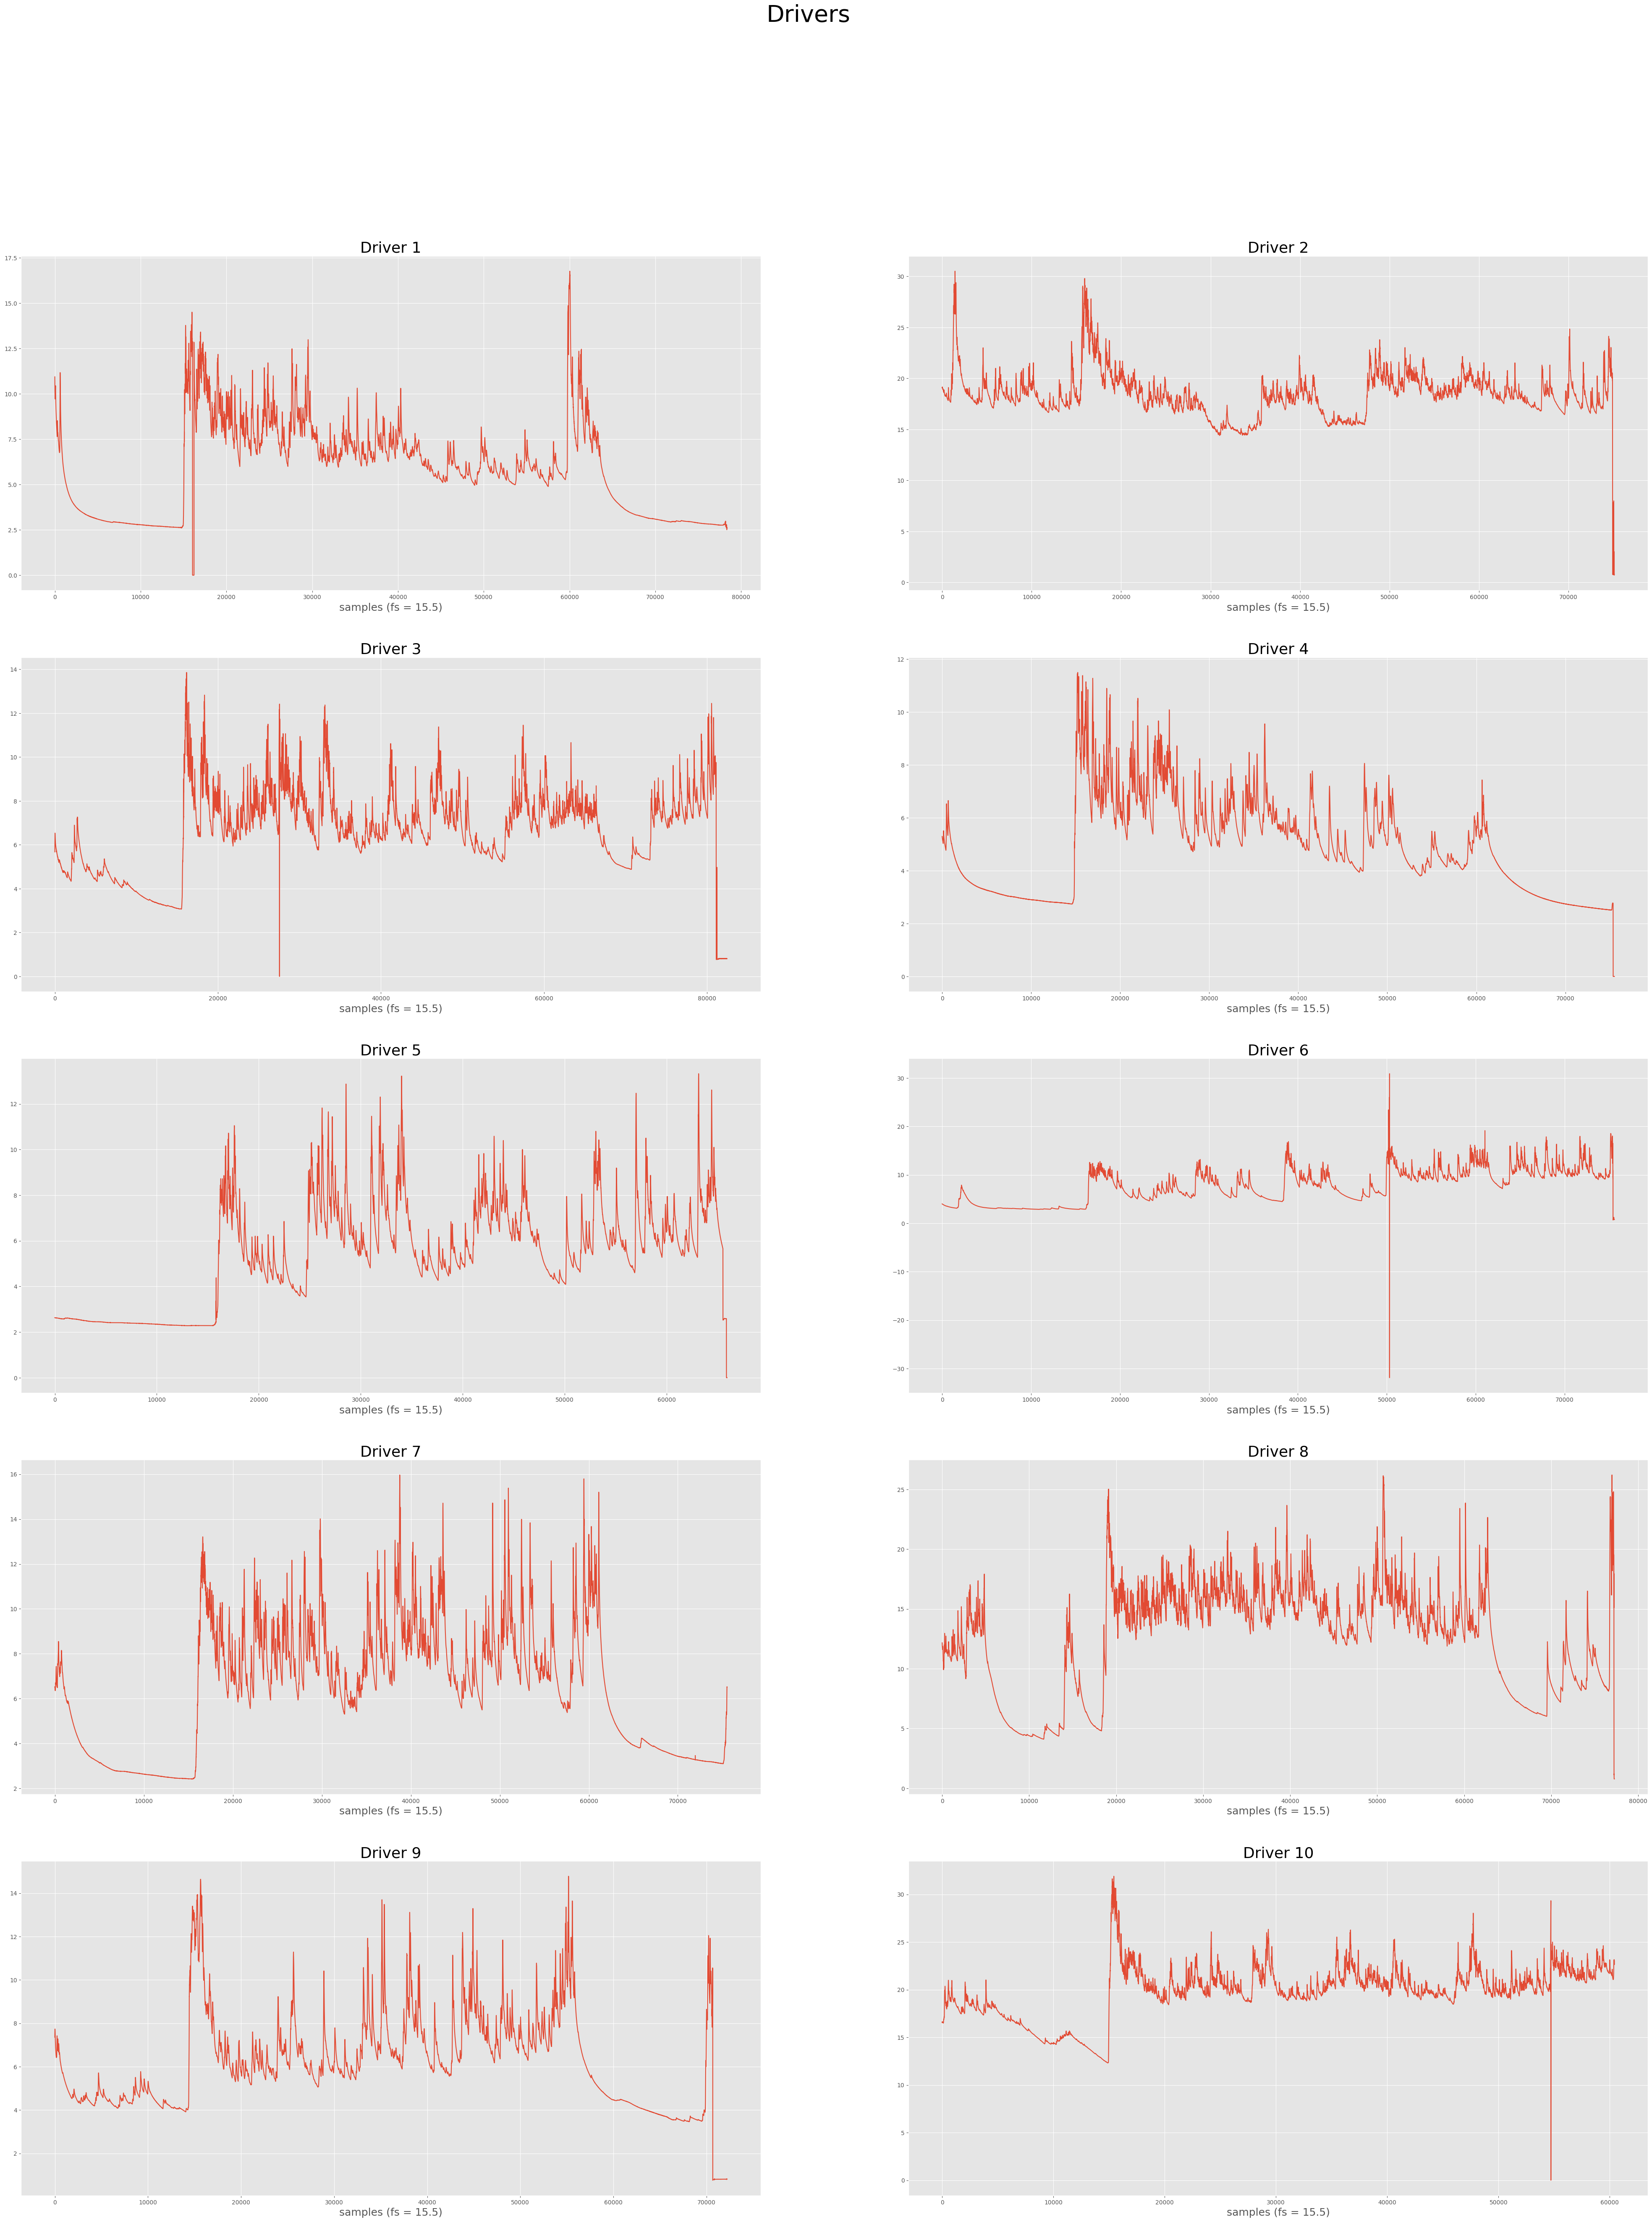

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(50, 60))
plt.suptitle("Drivers", fontsize=40)
for i in range(0, 10):
    plt.subplot(5, 2, i + 1)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(signal[i].T[3])
    plt.title("Driver %d" % (i + 1),fontsize=26)

In [ ]:
# sample processing data
def smaple_data(Drive_num, sample_time):
    result_list = []
    loc_start = int(sample_time * 15.5 * 60)
    # print("         ", Drive_num + 1, loc_start)
    loc_end = int(loc_start + 60 * 15.5)
    # mhGSR_data
    mhGSR_data = round(sum(signal[Drive_num].T[3][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mhGSR_data)
    # mfGSR
    mfGSR_data = round(sum(signal[Drive_num].T[2][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mfGSR_data)
    # mEMG
    mEMG_data = round(sum(signal[Drive_num].T[1][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mEMG_data)
    # rEMG
    rEMG_data = round(math.sqrt(sum([x ** 2 for x in signal[Drive_num].T[1][loc_start:loc_end]]) / (60 * 15.5)), 2)
    # rEMG_data = round(sum(signal[Drive_num].T[1][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(rEMG_data)
    # RR
    RR_data = round(sum(signal[Drive_num].T[6][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(RR_data)
    # mHR
    mHR_data = round(sum(signal[Drive_num].T[4][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mHR_data)
    return result_list

# Create a Dataframe of training features and labels, stress: 1, 3, and 5 represent low, medium, and high stress, respectively
df = pd.DataFrame(columns=['mhGSR', 'mfGSR', 'mEMG', 'rEMG', 'RR', 'mHR', 'stress'])
for Drive_num in range(0,10):
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Rest1'])
    result.append(1)
    df.loc[len(df)] = result
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'City1'])
    result.append(5)
    df.loc[len(df)] = result
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Hwy1'])
    result.append(3)
    df.loc[len(df)] = result
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'City2'])
    result.append(5)
    df.loc[len(df)] = result
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Hwy2'])
    result.append(3)
    df.loc[len(df)] = result
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'City3'])
    result.append(5)
    df.loc[len(df)] = result
    if((Drive_num == 4) or (Drive_num == 9)):
        continue
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Rest2'])
    result.append(1)
    df.loc[len(df)] = result

pd.set_option('display.max_rows', None)
df

,mhGSR,mfGSR,mEMG,rEMG,RR,mHR,stress
0,2.79,2.67,0.21,0.22,20.95,64.85,1.0
1,9.39,7.15,1.94,2.57,26.22,80.28,5.0
2,6.67,5.50,0.57,0.64,33.05,0.00,3.0
3,7.38,6.18,2.53,3.79,28.14,74.94,5.0
4,6.19,5.56,1.85,2.45,28.63,73.96,3.0
5,5.70,5.39,2.25,2.53,34.93,78.50,5.0
6,3.32,2.72,0.17,0.18,35.36,64.72,1.0
7,19.27,8.61,0.63,0.67,35.68,87.03,1.0
8,20.31,12.47,0.75,1.31,39.00,105.44,5.0
9,15.61,8.18,0.79,1.66,30.75,91.75,3.0



Figure 8: Pairwise Correlation Plot


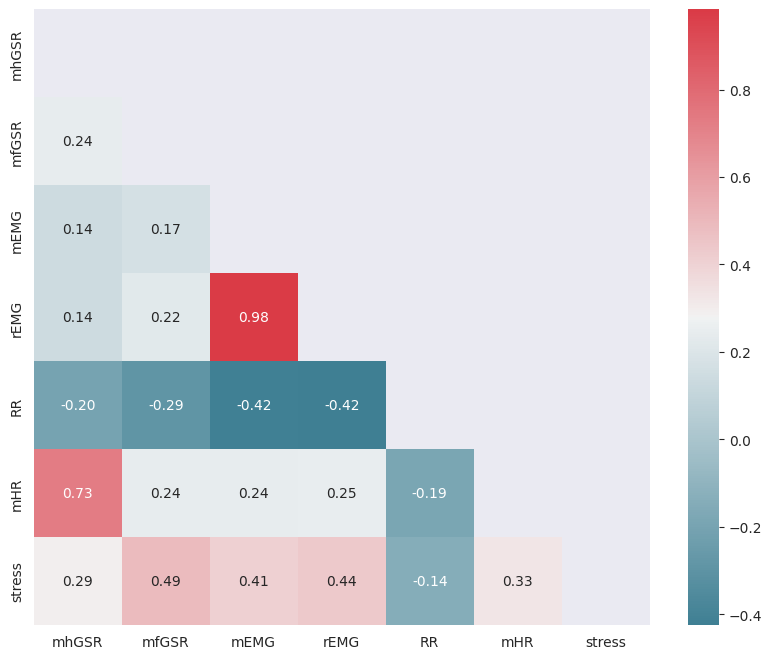

In [ ]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnm = df.columns.tolist()
mcorr = df[colnm].corr()
mask = np.zeros_like(mcorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("\nFigure 8: Pairwise Correlation Plot")

In [ ]:
from imblearn.over_sampling import SMOTE    #SMOTE Technique
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
X = df.drop(columns=['stress'])
y = df['stress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# transform the dataset
oversample = SMOTE(k_neighbors=2)
X_train, y_train = oversample.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print("Model Accuracy : ", accuracy_score(y_pred, y_test), '\n')

[1. 1. 3. 5. 3. 5. 5. 1. 3. 1. 3. 1. 3. 1. 5. 3. 5. 3. 1. 3. 5. 5. 3.]
Model Accuracy :  0.5217391304347826 



In [ ]:
X = df.drop(columns=['stress'])
y = df['stress']

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 1200)  # 5*5 from image dimension
        self.fc2 = nn.Linear(1200, 1200)
        self.fc3 = nn.Linear(1200, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=6, out_features=1200, bias=True)
  (fc2): Linear(in_features=1200, out_features=1200, bias=True)
  (fc3): Linear(in_features=1200, out_features=1, bias=True)
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/6, random_state=42)

X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())


criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
net = net.to(device)
criterion = criterion.to(device)


def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)


def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)


def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(10000):
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)
      y_test_pred = net(X_test)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = calculate_accuracy(y_test, y_test_pred)
      if epoch % 1000 == 0:
        print(f'''epoch {epoch}
          Train set - loss: {round_tensor(train_loss)},
          accuracy: {round_tensor(train_acc)}
          Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
          ''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0 
          Train set - loss: 10.408, 
          accuracy: 0.107
          Test  set - loss: 9.93, accuracy: 0.0
          
epoch 1000 
          Train set - loss: 0.272, 
          accuracy: 0.268
          Test  set - loss: 1.402, accuracy: 0.25
          
epoch 2000 
          Train set - loss: 0.115, 
          accuracy: 0.268
          Test  set - loss: 1.673, accuracy: 0.25
          
epoch 3000 
          Train set - loss: 0.073, 
          accuracy: 0.268
          Test  set - loss: 1.791, accuracy: 0.25
          
epoch 4000 
          Train set - loss: 0.044, 
          accuracy: 0.268
          Test  set - loss: 1.674, accuracy: 0.25
          
epoch 5000 
          Train set - loss: 0.015, 
          accuracy: 0.268
          Test  set - loss: 1.471, accuracy: 0.25
          
epoch 6000 
          Train set - loss: 0.012, 
          accuracy: 0.268
          Test  set - loss: 1.329, accuracy: 0.25
          
epoch 7000 
          Train set - loss: 0.182, 
          a